In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import random 
import copy

from sklearn import datasets 
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.model_selection import train_test_split 
from random import randint 
from sklearn.metrics import mean_absolute_error as mae 
from tqdm import tqdm 

In [2]:
mnist = datasets.load_digits()

X = mnist.data 
y = mnist.target 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [3]:
print(X_train.shape)
print(y_train.shape)

(1257, 64)
(1257,)


In [4]:
# initialize population 
def intialize_population(pop_size):
    pop = [[]] * pop_size   # create a list(=A) of lists(=B). There are 'pop_size' lists(=B) in the list(=A)
    activation = ['identity', 'logistic', 'tanh', 'relu']
    solver = ['sgd', 'adam']
    pop = [[random.choice(activation), random.choice(solver), randint(2, 4), randint(2, 4)] for i in tqdm(range(0, pop_size))]
    return pop

In [5]:
def crossover_mlp(parent1, parent2):
    child = [parent1[0], parent2[1], parent1[2], parent2[3]]
    return child 

In [6]:
def mutation_mlp(children, prob):
    for c in range(0, len(children)):
        if np.random.rand() > prob:
            k = randint(2, 3)
            children[c][k] = int(children[c][k]) + randint(-3, 6)

    children = np.array(children)
    return children 

In [7]:
def fitness_mlp(pop, X_train, y_train, X_test, y_test):
    fitness = []

    for individual in tqdm(pop):
        clf = MLPClassifier(learning_rate_init=0.1, 
                            activation=individual[0],
                            solver = individual[1], 
                            hidden_layer_sizes=(int(individual[2]), int(individual[3])),  
                            max_iter=2000)
        
        try:
            clf.fit(X_train, y_train)
            f = accuracy_score(clf.predict(X_test), y_test)
            fitness.append([f, clf, individual])
        except:
            print('--- WARNING --- INVALID VALUE ENCOUNTERED ---')

    fitness = np.array(fitness)
    return fitness 

In [8]:
def ga_main_mlp(X_train, y_train, X_test, y_test, generations=10, pop_size=20, mutation_prob=0.1):
    # generate population 
    print("Generating initial population ...")
    population = intialize_population(pop_size) 
    accruacy_history = list()

    for gen in range(generations):
        print(f"\n --- Generation: {gen} | Population: {len(population)}")

        # a new individual will go to this 'new_population'
        new_population = list()

        print("Calculating fitness for each individual ...")
        fitness = fitness_mlp(population, X_train, y_train, X_test, y_test)

        # sort all individuals by fitness(=accuracy) in decreasing order
        fitness_sorted = np.array(list(reversed(sorted(fitness, key=lambda x: x[0]))))

        num_individuals = len(fitness_sorted)

        # 85 percent of them remain the same 
        num_remainings = int(num_individuals * 0.85)
        for idx in range(num_remainings):
            new_population.append(fitness_sorted[:, -1][idx])

        # 30 percent of them perform crossover and mutation 
        num_cross_mutate = int(num_individuals * 0.15)
        
        # flatten and shuffle fitness_sorted
        individuals = fitness_sorted[:, 2].flatten()
        np.random.shuffle(individuals)

        # select half of the individuals for each parent
        half = num_individuals // 2
        parent_1 = individuals[:half]
        parent_2 = individuals[half:half*2]
        
        # cross-over
        child_1 = [crossover_mlp(parent_1[i], parent_2[i]) for i in range(num_cross_mutate)]
        child_2 = [crossover_mlp(parent_2[i], parent_1[i]) for i in range(num_cross_mutate)]
        
        # cross-over and mutation 
        child_1 = mutation_mlp(child_1, mutation_prob)
        child_2 = mutation_mlp(child_2, mutation_prob)

        for idx2 in range(len(child_1)):
            new_population.append(child_1[idx2])
        
        for idx3 in range(len(child_2)):
            new_population.append(child_2[idx3])

        new_population = np.array(new_population)
        
        population = copy.deepcopy(new_population)

        print(f"Best Fitness: {fitness_sorted[0][0]}")
        accruacy_history.append(fitness_sorted[0][0])
    
    return accruacy_history

In [9]:
history = ga_main_mlp(X_train, y_train, X_test, y_test, generations=50, pop_size=20, mutation_prob=0.1)

Generating initial population ...


100%|██████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 266305.02it/s]



 --- Generation: 0 | Population: 20
Calculating fitness for each individual ...


  0%|                                                                                           | 0/20 [00:00<?, ?it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 30%|████████████████████████▉                                                          | 6/20 [00:01<00:03,  3.91it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


 85%|█████████████████████████████████████████████████████████████████████▋            | 17/20 [00:02<00:00, 12.97it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:03<00:00,  5.09it/s]
/var/folders/th/6wqm42zn0ll89n2yx3n1c8j00000gn/T/ipykernel_55148/3787279264.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or nda

--- WARNING --- INVALID VALUE ENCOUNTERED ---
Best Fitness: 0.8777777777777778

 --- Generation: 1 | Population: 19
Calculating fitness for each individual ...


100%|██████████████████████████████████████████████████████████████████████████████████| 19/19 [00:00<00:00, 19.62it/s]
/var/folders/th/6wqm42zn0ll89n2yx3n1c8j00000gn/T/ipykernel_55148/3787279264.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  fitness = np.array(fitness)


Best Fitness: 0.8703703703703703

 --- Generation: 2 | Population: 20
Calculating fitness for each individual ...


 95%|█████████████████████████████████████████████████████████████████████████████▉    | 19/20 [00:01<00:00, 21.90it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 16.34it/s]
/var/folders/th/6wqm42zn0ll89n2yx3n1c8j00000gn/T/ipykernel_55148/3787279264.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  fitness = np.array(fitness)


Best Fitness: 0.8666666666666667

 --- Generation: 3 | Population: 20
Calculating fitness for each individual ...


 90%|█████████████████████████████████████████████████████████████████████████▊        | 18/20 [00:01<00:00, 20.43it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:02<00:00,  7.02it/s]
/var/folders/th/6wqm42zn0ll89n2yx3n1c8j00000gn/T/ipykernel_55148/3787279264.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

--- WARNING --- INVALID VALUE ENCOUNTERED ---
Best Fitness: 0.8703703703703703

 --- Generation: 4 | Population: 20
Calculating fitness for each individual ...


100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:01<00:00, 15.47it/s]
/var/folders/th/6wqm42zn0ll89n2yx3n1c8j00000gn/T/ipykernel_55148/3787279264.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  fitness = np.array(fitness)


Best Fitness: 0.8722222222222222

 --- Generation: 5 | Population: 23
Calculating fitness for each individual ...


100%|██████████████████████████████████████████████████████████████████████████████████| 23/23 [00:01<00:00, 12.85it/s]
/var/folders/th/6wqm42zn0ll89n2yx3n1c8j00000gn/T/ipykernel_55148/3787279264.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  fitness = np.array(fitness)


Best Fitness: 0.8870370370370371

 --- Generation: 6 | Population: 25
Calculating fitness for each individual ...


 80%|█████████████████████████████████████████████████████████████████▌                | 20/25 [00:01<00:00, 17.60it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 88%|████████████████████████████████████████████████████████████████████████▏         | 22/25 [00:03<00:00,  3.73it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


100%|██████████████████████████████████████████████████████████████████████████████████| 25/25 [00:03<00:00,  6.93it/s]
/var/folders/th/6wqm42zn0ll89n2yx3n1c8j00000gn/T/ipykernel_55148/3787279264.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  fitness = np.array(fitness)


Best Fitness: 0.8944444444444445

 --- Generation: 7 | Population: 26
Calculating fitness for each individual ...


 88%|████████████████████████████████████████████████████████████████████████▌         | 23/26 [00:02<00:00, 11.05it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
100%|██████████████████████████████████████████████████████████████████████████████████| 26/26 [00:03<00:00,  6.54it/s]
/var/folders/th/6wqm42zn0ll89n2yx3n1c8j00000gn/T/ipykernel_55148/3787279264.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or nda

--- WARNING --- INVALID VALUE ENCOUNTERED ---
Best Fitness: 0.8703703703703703

 --- Generation: 8 | Population: 27
Calculating fitness for each individual ...


 78%|███████████████████████████████████████████████████████████████▊                  | 21/27 [00:02<00:00, 13.11it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 89%|████████████████████████████████████████████████████████████████████████▉         | 24/27 [00:03<00:00,  4.01it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:03<00:00,  6.81it/s]
/var/folders/th/6wqm42zn0ll89n2yx3n1c8j00000gn/T/ipykernel_55148/3787279264.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  fitness = np.array(fitness)


--- WARNING --- INVALID VALUE ENCOUNTERED ---
Best Fitness: 0.8907407407407407

 --- Generation: 9 | Population: 27
Calculating fitness for each individual ...


100%|██████████████████████████████████████████████████████████████████████████████████| 27/27 [00:02<00:00,  9.52it/s]
/var/folders/th/6wqm42zn0ll89n2yx3n1c8j00000gn/T/ipykernel_55148/3787279264.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  fitness = np.array(fitness)


Best Fitness: 0.9

 --- Generation: 10 | Population: 30
Calculating fitness for each individual ...


 70%|█████████████████████████████████████████████████████████▍                        | 21/30 [00:02<00:01,  8.78it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 83%|████████████████████████████████████████████████████████████████████▎             | 25/30 [00:04<00:01,  4.01it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:04<00:00,  6.18it/s]
/var/folders/th/6wqm42zn0ll89n2yx3n1c8j00000gn/T/ipykernel_55148/3787279264.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  fitness = np.array(fitness)


Best Fitness: 0.9166666666666666

 --- Generation: 11 | Population: 32
Calculating fitness for each individual ...


 81%|██████████████████████████████████████████████████████████████████▋               | 26/32 [00:02<00:00, 10.82it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 88%|███████████████████████████████████████████████████████████████████████▊          | 28/32 [00:04<00:01,  2.76it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [00:05<00:00,  6.16it/s]
/var/folders/th/6wqm42zn0ll89n2yx3n1c8j00000gn/T/ipykernel_55148/3787279264.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  fitness = np.array(fitness)


Best Fitness: 0.9314814814814815

 --- Generation: 12 | Population: 34
Calculating fitness for each individual ...


 82%|███████████████████████████████████████████████████████████████████▌              | 28/34 [00:03<00:00,  9.22it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


--- WARNING --- INVALID VALUE ENCOUNTERED ---


/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 94%|█████████████████████████████████████████████████████████████████████████████▏    | 32/34 [00:04<00:00,  3.98it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


100%|██████████████████████████████████████████████████████████████████████████████████| 34/34 [00:05<00:00,  6.40it/s]
/var/folders/th/6wqm42zn0ll89n2yx3n1c8j00000gn/T/ipykernel_55148/3787279264.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  fitness = np.array(fitness)


Best Fitness: 0.9203703703703704

 --- Generation: 13 | Population: 35
Calculating fitness for each individual ...


100%|██████████████████████████████████████████████████████████████████████████████████| 35/35 [00:04<00:00,  7.58it/s]
/var/folders/th/6wqm42zn0ll89n2yx3n1c8j00000gn/T/ipykernel_55148/3787279264.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  fitness = np.array(fitness)


Best Fitness: 0.9277777777777778

 --- Generation: 14 | Population: 39
Calculating fitness for each individual ...


 85%|█████████████████████████████████████████████████████████████████████▍            | 33/39 [00:03<00:00, 12.83it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---
--- WARNING --- INVALID VALUE ENCOUNTERED ---


 95%|█████████████████████████████████████████████████████████████████████████████▊    | 37/39 [00:04<00:00, 12.83it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


100%|██████████████████████████████████████████████████████████████████████████████████| 39/39 [00:04<00:00,  8.92it/s]
/var/folders/th/6wqm42zn0ll89n2yx3n1c8j00000gn/T/ipykernel_55148/3787279264.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  fitness = np.array(fitness)


Best Fitness: 0.9111111111111111

 --- Generation: 15 | Population: 40
Calculating fitness for each individual ...


 82%|███████████████████████████████████████████████████████████████████▋              | 33/40 [00:04<00:00,  7.56it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 85%|█████████████████████████████████████████████████████████████████████▋            | 34/40 [00:06<00:02,  2.28it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/skle

--- WARNING --- INVALID VALUE ENCOUNTERED ---
--- WARNING --- INVALID VALUE ENCOUNTERED ---


/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 95%|█████████████████████████████████████████████████████████████████████████████▉    | 38/40 [00:07<00:00,  2.44it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:08<00:00,  4.93it/s]
/var/folders/th/6wqm42zn0ll89n2yx3n1c8j00000gn/T/ipykernel_55148/3787279264.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  fitness = np.array(fitness)


Best Fitness: 0.9296296296296296

 --- Generation: 16 | Population: 41
Calculating fitness for each individual ...


 76%|██████████████████████████████████████████████████████████████                    | 31/41 [00:04<00:00, 10.54it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 80%|██████████████████████████████████████████████████████████████████                | 33/41 [00:06<00:02,  2.90it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


 85%|██████████████████████████████████████████████████████████████████████            | 35/41 [00:06<00:01,  3.58it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 93%|████████████████████████████████████████████████████████████████████████████      | 38/41 [00:09<00:01,  1.83it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


100%|██████████████████████████████████████████████████████████████████████████████████| 41/41 [00:09<00:00,  4.22it/s]
/var/folders/th/6wqm42zn0ll89n2yx3n1c8j00000gn/T/ipykernel_55148/3787279264.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  fitness = np.array(fitness)


Best Fitness: 0.9425925925925925

 --- Generation: 17 | Population: 43
Calculating fitness for each individual ...


 72%|███████████████████████████████████████████████████████████                       | 31/43 [00:05<00:01,  6.98it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 79%|████████████████████████████████████████████████████████████████▊                 | 34/43 [00:07<00:03,  2.89it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda

--- WARNING --- INVALID VALUE ENCOUNTERED ---


/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 84%|████████████████████████████████████████████████████████████████████▋             | 36/43 [00:09<00:03,  1.87it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


 91%|██████████████████████████████████████████████████████████████████████████▎       | 39/43 [00:09<00:01,  2.60it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 93%|████████████████████████████████████████████████████████████████████████████▎     | 40/43 [00:11<00:02,  1.48it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda

--- WARNING --- INVALID VALUE ENCOUNTERED ---


/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
100%|██████████████████████████████████████████████████████████████████████████████████| 43/43 [00:13<00:00,  3.15it/s]
/var/folders/th/6wqm42zn0ll89n2yx3n1c8j00000gn/T/ipykernel_55148/3787279264.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  fitness = np.array(fitness)


--- WARNING --- INVALID VALUE ENCOUNTERED ---
Best Fitness: 0.9296296296296296

 --- Generation: 18 | Population: 43
Calculating fitness for each individual ...


 95%|██████████████████████████████████████████████████████████████████████████████▏   | 41/43 [00:06<00:00,  5.60it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
100%|██████████████████████████████████████████████████████████████████████████████████| 43/43 [00:08<00:00,  5.05it/s]
/var/folders/th/6wqm42zn0ll89n2yx3n1c8j00000gn/T/ipykernel_55148/3787279264.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

--- WARNING --- INVALID VALUE ENCOUNTERED ---
Best Fitness: 0.9314814814814815

 --- Generation: 19 | Population: 47
Calculating fitness for each individual ...


 74%|█████████████████████████████████████████████████████████████                     | 35/47 [00:05<00:02,  5.92it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 83%|████████████████████████████████████████████████████████████████████              | 39/47 [00:07<00:02,  3.14it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


 85%|█████████████████████████████████████████████████████████████████████▊            | 40/47 [00:08<00:02,  3.28it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 96%|██████████████████████████████████████████████████████████████████████████████▌   | 45/47 [00:09<00:00,  3.20it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---
--- WARNING --- INVALID VALUE ENCOUNTERED ---


/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
100%|██████████████████████████████████████████████████████████████████████████████████| 47/47 [00:11<00:00,  3.96it/s]
/var/folders/th/6wqm42zn0ll89n2yx3n1c8j00000gn/T/ipykernel_55148/3787279264.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you 

--- WARNING --- INVALID VALUE ENCOUNTERED ---
Best Fitness: 0.9481481481481482

 --- Generation: 20 | Population: 48
Calculating fitness for each individual ...


 92%|███████████████████████████████████████████████████████████████████████████▏      | 44/48 [00:07<00:00,  6.15it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 96%|██████████████████████████████████████████████████████████████████████████████▌   | 46/48 [00:09<00:00,  2.14it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


 98%|████████████████████████████████████████████████████████████████████████████████▎ | 47/48 [00:09<00:00,  2.34it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:11<00:00,  4.11it/s]
/var/folders/th/6wqm42zn0ll89n2yx3n1c8j00000gn/T/ipykernel_55148/3787279264.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

--- WARNING --- INVALID VALUE ENCOUNTERED ---
Best Fitness: 0.9444444444444444

 --- Generation: 21 | Population: 51
Calculating fitness for each individual ...


 76%|██████████████████████████████████████████████████████████████▋                   | 39/51 [00:07<00:02,  5.61it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 80%|█████████████████████████████████████████████████████████████████▉                | 41/51 [00:09<00:05,  1.87it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda

--- WARNING --- INVALID VALUE ENCOUNTERED ---


/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 82%|███████████████████████████████████████████████████████████████████▌              | 42/51 [00:10<00:07,  1.26it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


 86%|██████████████████████████████████████████████████████████████████████▋           | 44/51 [00:11<00:03,  1.92it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 94%|█████████████████████████████████████████████████████████████████████████████▏    | 48/51 [00:12<00:01,  2.39it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda

--- WARNING --- INVALID VALUE ENCOUNTERED ---


/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


--- WARNING --- INVALID VALUE ENCOUNTERED ---


/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
100%|██████████████████████████████████████████████████████████████████████████████████| 51/51 [00:16<00:00,  3.13it/s]
/var/folders/th/6wqm42zn0ll89n2yx3n1c8j00000gn/T/ipykernel_55148/3787279264.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  fitness = np.array(fitness)


--- WARNING --- INVALID VALUE ENCOUNTERED ---
Best Fitness: 0.9518518518518518

 --- Generation: 22 | Population: 51
Calculating fitness for each individual ...


 76%|██████████████████████████████████████████████████████████████▋                   | 39/51 [00:07<00:01,  6.33it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 78%|████████████████████████████████████████████████████████████████▎                 | 40/51 [00:09<00:07,  1.49it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda

--- WARNING --- INVALID VALUE ENCOUNTERED ---


/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 84%|█████████████████████████████████████████████████████████████████████▏            | 43/51 [00:10<00:04,  1.77it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


 92%|███████████████████████████████████████████████████████████████████████████▌      | 47/51 [00:11<00:01,  3.65it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 94%|█████████████████████████████████████████████████████████████████████████████▏    | 48/51 [00:13<00:02,  1.50it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda

--- WARNING --- INVALID VALUE ENCOUNTERED ---


/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 98%|████████████████████████████████████████████████████████████████████████████████▍ | 50/51 [00:15<00:00,  1.31it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


100%|██████████████████████████████████████████████████████████████████████████████████| 51/51 [00:15<00:00,  3.26it/s]
/var/folders/th/6wqm42zn0ll89n2yx3n1c8j00000gn/T/ipykernel_55148/3787279264.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  fitness = np.array(fitness)


Best Fitness: 0.9574074074074074

 --- Generation: 23 | Population: 53
Calculating fitness for each individual ...


 85%|█████████████████████████████████████████████████████████████████████▌            | 45/53 [00:08<00:00,  8.11it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 92%|███████████████████████████████████████████████████████████████████████████▊      | 49/53 [00:10<00:01,  3.62it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---
--- WARNING --- INVALID VALUE ENCOUNTERED ---


 94%|█████████████████████████████████████████████████████████████████████████████▎    | 50/53 [00:11<00:00,  3.05it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


--- WARNING --- INVALID VALUE ENCOUNTERED ---


/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
100%|██████████████████████████████████████████████████████████████████████████████████| 53/53 [00:13<00:00,  4.05it/s]
/var/folders/th/6wqm42zn0ll89n2yx3n1c8j00000gn/T/ipykernel_55148/3787279264.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  fitness = np.array(fitness)


--- WARNING --- INVALID VALUE ENCOUNTERED ---
Best Fitness: 0.9481481481481482

 --- Generation: 24 | Population: 55
Calculating fitness for each individual ...


 89%|█████████████████████████████████████████████████████████████████████████         | 49/55 [00:08<00:00,  8.70it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 95%|█████████████████████████████████████████████████████████████████████████████▌    | 52/55 [00:10<00:00,  3.30it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
100%|██████████████████████████████████████████████████████████████████████████████████| 55/55 [00:12<00:00,  4.51it/s]
/var/folders/th/6wqm42zn0ll89n2yx3n1c8j00000gn/T/ipykernel_55148/3787279264.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when cr

--- WARNING --- INVALID VALUE ENCOUNTERED ---
Best Fitness: 0.9518518518518518

 --- Generation: 25 | Population: 59
Calculating fitness for each individual ...


 76%|██████████████████████████████████████████████████████████████▌                   | 45/59 [00:08<00:01,  8.42it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 78%|███████████████████████████████████████████████████████████████▉                  | 46/59 [00:09<00:06,  2.01it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda

--- WARNING --- INVALID VALUE ENCOUNTERED ---


/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 81%|██████████████████████████████████████████████████████████████████▋               | 48/59 [00:11<00:07,  1.50it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


 85%|█████████████████████████████████████████████████████████████████████▍            | 50/59 [00:12<00:04,  2.15it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 92%|███████████████████████████████████████████████████████████████████████████       | 54/59 [00:13<00:02,  2.47it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 95%|█████████████████████████████████████████████████████████████████████████████▊    | 56/59 [00:15<00:01,  1.71it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret 

--- WARNING --- INVALID VALUE ENCOUNTERED ---


/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 97%|███████████████████████████████████████████████████████████████████████████████▏  | 57/59 [00:17<00:01,  1.20it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


100%|██████████████████████████████████████████████████████████████████████████████████| 59/59 [00:18<00:00,  3.27it/s]
/var/folders/th/6wqm42zn0ll89n2yx3n1c8j00000gn/T/ipykernel_55148/3787279264.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  fitness = np.array(fitness)


Best Fitness: 0.95

 --- Generation: 26 | Population: 61
Calculating fitness for each individual ...


 80%|█████████████████████████████████████████████████████████████████▊                | 49/61 [00:07<00:01,  8.77it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 82%|███████████████████████████████████████████████████████████████████▏              | 50/61 [00:09<00:05,  2.10it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda

--- WARNING --- INVALID VALUE ENCOUNTERED ---


/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 87%|███████████████████████████████████████████████████████████████████████▏          | 53/61 [00:11<00:04,  1.79it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


 92%|███████████████████████████████████████████████████████████████████████████▎      | 56/61 [00:11<00:01,  3.32it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 98%|████████████████████████████████████████████████████████████████████████████████▋ | 60/61 [00:13<00:00,  2.81it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda

--- WARNING --- INVALID VALUE ENCOUNTERED ---


/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
100%|██████████████████████████████████████████████████████████████████████████████████| 61/61 [00:15<00:00,  3.86it/s]
/var/folders/th/6wqm42zn0ll89n2yx3n1c8j00000gn/T/ipykernel_55148/3787279264.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  fitness = np.array(fitness)


--- WARNING --- INVALID VALUE ENCOUNTERED ---
Best Fitness: 0.9425925925925925

 --- Generation: 27 | Population: 64
Calculating fitness for each individual ...


 84%|█████████████████████████████████████████████████████████████████████▏            | 54/64 [00:08<00:01,  8.10it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 86%|██████████████████████████████████████████████████████████████████████▍           | 55/64 [00:10<00:04,  2.22it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


 98%|████████████████████████████████████████████████████████████████████████████████▋ | 63/64 [00:11<00:00,  4.65it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
100%|██████████████████████████████████████████████████████████████████████████████████| 64/64 [00:13<00:00,  4.68it/s]
/var/folders/th/6wqm42zn0ll89n2yx3n1c8j00000gn/T/ipykernel_55148/3787279264.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or nda

--- WARNING --- INVALID VALUE ENCOUNTERED ---
Best Fitness: 0.9592592592592593

 --- Generation: 28 | Population: 70
Calculating fitness for each individual ...


 79%|████████████████████████████████████████████████████████████████▍                 | 55/70 [00:08<00:01,  8.94it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


 81%|██████████████████████████████████████████████████████████████████▊               | 57/70 [00:08<00:01,  9.28it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 87%|███████████████████████████████████████████████████████████████████████▍          | 61/70 [00:10<00:02,  3.26it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/skle

--- WARNING --- INVALID VALUE ENCOUNTERED ---


/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 91%|██████████████████████████████████████████████████████████████████████████▉       | 64/70 [00:12<00:02,  2.45it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


--- WARNING --- INVALID VALUE ENCOUNTERED ---


/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 93%|████████████████████████████████████████████████████████████████████████████▏     | 65/70 [00:14<00:03,  1.48it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


100%|██████████████████████████████████████████████████████████████████████████████████| 70/70 [00:16<00:00,  4.36it/s]
/var/folders/th/6wqm42zn0ll89n2yx3n1c8j00000gn/T/ipykernel_55148/3787279264.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  fitness = np.array(fitness)


Best Fitness: 0.9592592592592593

 --- Generation: 29 | Population: 74
Calculating fitness for each individual ...


 76%|██████████████████████████████████████████████████████████████                    | 56/74 [00:09<00:01,  9.90it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 78%|████████████████████████████████████████████████████████████████▎                 | 58/74 [00:11<00:05,  2.78it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda

--- WARNING --- INVALID VALUE ENCOUNTERED ---


/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 80%|█████████████████████████████████████████████████████████████████▍                | 59/74 [00:13<00:09,  1.54it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


 82%|███████████████████████████████████████████████████████████████████▌              | 61/74 [00:13<00:06,  1.88it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 85%|█████████████████████████████████████████████████████████████████████▊            | 63/74 [00:15<00:07,  1.48it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


100%|██████████████████████████████████████████████████████████████████████████████████| 74/74 [00:17<00:00,  4.34it/s]
/var/folders/th/6wqm42zn0ll89n2yx3n1c8j00000gn/T/ipykernel_55148/3787279264.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  fitness = np.array(fitness)


--- WARNING --- INVALID VALUE ENCOUNTERED ---
Best Fitness: 0.9685185185185186

 --- Generation: 30 | Population: 79
Calculating fitness for each individual ...


 76%|██████████████████████████████████████████████████████████████▎                   | 60/79 [00:10<00:02,  7.70it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 78%|████████████████████████████████████████████████████████████████▎                 | 62/79 [00:12<00:07,  2.18it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 82%|███████████████████████████████████████████████████████████████████▍              | 65/79 [00:14<00:07,  1.87it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


 89%|████████████████████████████████████████████████████████████████████████▋         | 70/79 [00:15<00:02,  4.43it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 94%|████████████████████████████████████████████████████████████████████████████▊     | 74/79 [00:17<00:01,  2.76it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


 99%|████████████████████████████████████████████████████████████████████████████████▉ | 78/79 [00:17<00:00,  4.96it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [00:19<00:00,  4.05it/s]
/var/folders/th/6wqm42zn0ll89n2yx3n1c8j00000gn/T/ipykernel_55148/3787279264.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

--- WARNING --- INVALID VALUE ENCOUNTERED ---
Best Fitness: 0.9518518518518518

 --- Generation: 31 | Population: 85
Calculating fitness for each individual ...


 99%|█████████████████████████████████████████████████████████████████████████████████ | 84/85 [00:13<00:00,  7.65it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
100%|██████████████████████████████████████████████████████████████████████████████████| 85/85 [00:15<00:00,  5.52it/s]
/var/folders/th/6wqm42zn0ll89n2yx3n1c8j00000gn/T/ipykernel_55148/3787279264.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list

--- WARNING --- INVALID VALUE ENCOUNTERED ---
Best Fitness: 0.9611111111111111

 --- Generation: 32 | Population: 95
Calculating fitness for each individual ...


 78%|███████████████████████████████████████████████████████████████▊                  | 74/95 [00:11<00:02, 10.41it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 80%|█████████████████████████████████████████████████████████████████▌                | 76/95 [00:13<00:08,  2.14it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


 92%|███████████████████████████████████████████████████████████████████████████       | 87/95 [00:15<00:01,  7.94it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 93%|███████████████████████████████████████████████████████████████████████████▉      | 88/95 [00:16<00:03,  2.05it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda

--- WARNING --- INVALID VALUE ENCOUNTERED ---


/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 98%|████████████████████████████████████████████████████████████████████████████████▎ | 93/95 [00:19<00:00,  2.38it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


--- WARNING --- INVALID VALUE ENCOUNTERED ---


/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
100%|██████████████████████████████████████████████████████████████████████████████████| 95/95 [00:21<00:00,  4.52it/s]
/var/folders/th/6wqm42zn0ll89n2yx3n1c8j00000gn/T/ipykernel_55148/3787279264.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  fitness = np.array(fitness)


--- WARNING --- INVALID VALUE ENCOUNTERED ---
Best Fitness: 0.9592592592592593

 --- Generation: 33 | Population: 103
Calculating fitness for each individual ...


 76%|█████████████████████████████████████████████████████████████▎                   | 78/103 [00:12<00:02, 11.31it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 78%|██████████████████████████████████████████████████████████████▉                  | 80/103 [00:14<00:07,  2.91it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/skle

--- WARNING --- INVALID VALUE ENCOUNTERED ---


/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 80%|████████████████████████████████████████████████████████████████▍                | 82/103 [00:16<00:09,  2.12it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


 88%|███████████████████████████████████████████████████████████████████████▌         | 91/103 [00:17<00:01,  7.01it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 89%|████████████████████████████████████████████████████████████████████████▎        | 92/103 [00:19<00:05,  2.12it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


 91%|█████████████████████████████████████████████████████████████████████████▉       | 94/103 [00:19<00:03,  2.77it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 95%|█████████████████████████████████████████████████████████████████████████████    | 98/103 [00:21<00:02,  2.33it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/skle

--- WARNING --- INVALID VALUE ENCOUNTERED ---


/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 98%|██████████████████████████████████████████████████████████████████████████████▍ | 101/103 [00:23<00:00,  2.02it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


--- WARNING --- INVALID VALUE ENCOUNTERED ---


/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
100%|████████████████████████████████████████████████████████████████████████████████| 103/103 [00:25<00:00,  3.99it/s]
/var/folders/th/6wqm42zn0ll89n2yx3n1c8j00000gn/T/ipykernel_55148/3787279264.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  fitness = np.array(fitness)


--- WARNING --- INVALID VALUE ENCOUNTERED ---
Best Fitness: 0.9592592592592593

 --- Generation: 34 | Population: 110
Calculating fitness for each individual ...


 86%|█████████████████████████████████████████████████████████████████████▉           | 95/110 [00:14<00:01,  7.72it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 89%|████████████████████████████████████████████████████████████████████████▏        | 98/110 [00:16<00:04,  2.75it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda

--- WARNING --- INVALID VALUE ENCOUNTERED ---


/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 92%|█████████████████████████████████████████████████████████████████████████▍      | 101/110 [00:18<00:04,  2.10it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


 93%|██████████████████████████████████████████████████████████████████████████▏     | 102/110 [00:18<00:03,  2.54it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 94%|██████████████████████████████████████████████████████████████████████████▉     | 103/110 [00:20<00:05,  1.36it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


 96%|█████████████████████████████████████████████████████████████████████████████   | 106/110 [00:21<00:01,  2.32it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 98%|██████████████████████████████████████████████████████████████████████████████▌ | 108/110 [00:23<00:01,  1.58it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


100%|████████████████████████████████████████████████████████████████████████████████| 110/110 [00:23<00:00,  4.69it/s]
/var/folders/th/6wqm42zn0ll89n2yx3n1c8j00000gn/T/ipykernel_55148/3787279264.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  fitness = np.array(fitness)


Best Fitness: 0.9666666666666667

 --- Generation: 35 | Population: 120
Calculating fitness for each individual ...


 88%|██████████████████████████████████████████████████████████████████████          | 105/120 [00:15<00:01,  8.82it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 88%|██████████████████████████████████████████████████████████████████████▋         | 106/120 [00:17<00:08,  1.66it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/skle

--- WARNING --- INVALID VALUE ENCOUNTERED ---


/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 91%|████████████████████████████████████████████████████████████████████████▋       | 109/120 [00:19<00:06,  1.79it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


--- WARNING --- INVALID VALUE ENCOUNTERED ---


/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 93%|██████████████████████████████████████████████████████████████████████████▋     | 112/120 [00:21<00:04,  1.86it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


 95%|████████████████████████████████████████████████████████████████████████████    | 114/120 [00:21<00:02,  2.53it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 98%|██████████████████████████████████████████████████████████████████████████████  | 117/120 [00:23<00:01,  2.21it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


100%|████████████████████████████████████████████████████████████████████████████████| 120/120 [00:23<00:00,  5.07it/s]
/var/folders/th/6wqm42zn0ll89n2yx3n1c8j00000gn/T/ipykernel_55148/3787279264.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  fitness = np.array(fitness)


Best Fitness: 0.9629629629629629

 --- Generation: 36 | Population: 132
Calculating fitness for each individual ...


 73%|███████████████████████████████████████████████████████████▌                     | 97/132 [00:14<00:04,  8.25it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 75%|████████████████████████████████████████████████████████████▊                    | 99/132 [00:16<00:15,  2.16it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda

--- WARNING --- INVALID VALUE ENCOUNTERED ---


/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 77%|█████████████████████████████████████████████████████████████▊                  | 102/132 [00:18<00:15,  1.99it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


 80%|███████████████████████████████████████████████████████████████▋                | 105/132 [00:18<00:07,  3.41it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 82%|█████████████████████████████████████████████████████████████████▍              | 108/132 [00:20<00:09,  2.44it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


100%|████████████████████████████████████████████████████████████████████████████████| 132/132 [00:23<00:00,  5.58it/s]
/var/folders/th/6wqm42zn0ll89n2yx3n1c8j00000gn/T/ipykernel_55148/3787279264.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  fitness = np.array(fitness)


Best Fitness: 0.9666666666666667

 --- Generation: 37 | Population: 147
Calculating fitness for each individual ...


 77%|█████████████████████████████████████████████████████████████▍                  | 113/147 [00:16<00:04,  7.43it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 79%|███████████████████████████████████████████████████████████████▏                | 116/147 [00:18<00:11,  2.69it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


 81%|████████████████████████████████████████████████████████████████▊               | 119/147 [00:18<00:06,  4.42it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 82%|█████████████████████████████████████████████████████████████████▎              | 120/147 [00:20<00:15,  1.79it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/skle

--- WARNING --- INVALID VALUE ENCOUNTERED ---


/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 83%|██████████████████████████████████████████████████████████████████▍             | 122/147 [00:21<00:17,  1.41it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


--- WARNING --- INVALID VALUE ENCOUNTERED ---


/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 85%|████████████████████████████████████████████████████████████████████            | 125/147 [00:23<00:14,  1.53it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


100%|████████████████████████████████████████████████████████████████████████████████| 147/147 [00:26<00:00,  5.58it/s]
/var/folders/th/6wqm42zn0ll89n2yx3n1c8j00000gn/T/ipykernel_55148/3787279264.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  fitness = np.array(fitness)


Best Fitness: 0.9666666666666667

 --- Generation: 38 | Population: 163
Calculating fitness for each individual ...


 75%|████████████████████████████████████████████████████████████▎                   | 123/163 [00:16<00:04,  9.18it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 77%|█████████████████████████████████████████████████████████████▊                  | 126/163 [00:17<00:11,  3.22it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


 82%|█████████████████████████████████████████████████████████████████▊              | 134/163 [00:19<00:04,  6.01it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 84%|███████████████████████████████████████████████████████████████████▏            | 137/163 [00:21<00:10,  2.53it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


100%|████████████████████████████████████████████████████████████████████████████████| 163/163 [00:24<00:00,  6.68it/s]
/var/folders/th/6wqm42zn0ll89n2yx3n1c8j00000gn/T/ipykernel_55148/3787279264.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  fitness = np.array(fitness)


Best Fitness: 0.9666666666666667

 --- Generation: 39 | Population: 184
Calculating fitness for each individual ...


 75%|████████████████████████████████████████████████████████████                    | 138/184 [00:18<00:06,  6.78it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 77%|█████████████████████████████████████████████████████████████▋                  | 142/184 [00:20<00:14,  2.96it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


 79%|███████████████████████████████████████████████████████████████▍                | 146/184 [00:20<00:08,  4.52it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 81%|████████████████████████████████████████████████████████████████▊               | 149/184 [00:22<00:13,  2.51it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


 84%|██████████████████████████████████████████████████████████████████▉             | 154/184 [00:23<00:06,  4.99it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 85%|████████████████████████████████████████████████████████████████████▎           | 157/184 [00:25<00:10,  2.67it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


 89%|███████████████████████████████████████████████████████████████████████▎        | 164/184 [00:26<00:03,  5.46it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 90%|████████████████████████████████████████████████████████████████████████▏       | 166/184 [00:28<00:08,  2.25it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


 92%|█████████████████████████████████████████████████████████████████████████▉      | 170/184 [00:28<00:03,  4.63it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 95%|███████████████████████████████████████████████████████████████████████████▋    | 174/184 [00:30<00:03,  2.68it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


 95%|████████████████████████████████████████████████████████████████████████████    | 175/184 [00:30<00:02,  3.10it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 97%|█████████████████████████████████████████████████████████████████████████████▍  | 178/184 [00:32<00:02,  2.29it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


100%|████████████████████████████████████████████████████████████████████████████████| 184/184 [00:33<00:00,  5.50it/s]
/var/folders/th/6wqm42zn0ll89n2yx3n1c8j00000gn/T/ipykernel_55148/3787279264.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  fitness = np.array(fitness)


Best Fitness: 0.9666666666666667

 --- Generation: 40 | Population: 203
Calculating fitness for each individual ...


 83%|██████████████████████████████████████████████████████████████████▌             | 169/203 [00:21<00:03,  8.81it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 85%|███████████████████████████████████████████████████████████████████▊            | 172/203 [00:23<00:10,  2.83it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


 95%|███████████████████████████████████████████████████████████████████████████▋    | 192/203 [00:25<00:01,  7.61it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 96%|████████████████████████████████████████████████████████████████████████████▊   | 195/203 [00:27<00:02,  2.73it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


 97%|█████████████████████████████████████████████████████████████████████████████▏  | 196/203 [00:27<00:02,  3.22it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 98%|██████████████████████████████████████████████████████████████████████████████  | 198/203 [00:29<00:02,  1.70it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda

--- WARNING --- INVALID VALUE ENCOUNTERED ---


/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 99%|███████████████████████████████████████████████████████████████████████████████▏| 201/203 [00:31<00:01,  1.79it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


100%|████████████████████████████████████████████████████████████████████████████████| 203/203 [00:32<00:00,  6.34it/s]
/var/folders/th/6wqm42zn0ll89n2yx3n1c8j00000gn/T/ipykernel_55148/3787279264.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  fitness = np.array(fitness)


Best Fitness: 0.9611111111111111

 --- Generation: 41 | Population: 227
Calculating fitness for each individual ...


 76%|████████████████████████████████████████████████████████████▌                   | 172/227 [00:21<00:05, 10.67it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 77%|█████████████████████████████████████████████████████████████▎                  | 174/227 [00:22<00:20,  2.63it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


 85%|███████████████████████████████████████████████████████████████████▋            | 192/227 [00:24<00:04,  8.52it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 86%|████████████████████████████████████████████████████████████████████▋           | 195/227 [00:26<00:10,  2.91it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


100%|████████████████████████████████████████████████████████████████████████████████| 227/227 [00:30<00:00,  7.47it/s]
/var/folders/th/6wqm42zn0ll89n2yx3n1c8j00000gn/T/ipykernel_55148/3787279264.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  fitness = np.array(fitness)


Best Fitness: 0.9666666666666667

 --- Generation: 42 | Population: 257
Calculating fitness for each individual ...


 76%|█████████████████████████████████████████████████████████████                   | 196/257 [00:23<00:06,  9.18it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 77%|█████████████████████████████████████████████████████████████▉                  | 199/257 [00:25<00:19,  2.91it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


100%|████████████████████████████████████████████████████████████████████████████████| 257/257 [00:31<00:00,  8.12it/s]
/var/folders/th/6wqm42zn0ll89n2yx3n1c8j00000gn/T/ipykernel_55148/3787279264.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  fitness = np.array(fitness)


Best Fitness: 0.9685185185185186

 --- Generation: 43 | Population: 293
Calculating fitness for each individual ...


100%|████████████████████████████████████████████████████████████████████████████████| 293/293 [00:33<00:00,  8.62it/s]
/var/folders/th/6wqm42zn0ll89n2yx3n1c8j00000gn/T/ipykernel_55148/3787279264.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  fitness = np.array(fitness)


Best Fitness: 0.9629629629629629

 --- Generation: 44 | Population: 335
Calculating fitness for each individual ...


100%|████████████████████████████████████████████████████████████████████████████████| 335/335 [00:36<00:00,  9.10it/s]
/var/folders/th/6wqm42zn0ll89n2yx3n1c8j00000gn/T/ipykernel_55148/3787279264.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  fitness = np.array(fitness)


Best Fitness: 0.9703703703703703

 --- Generation: 45 | Population: 384
Calculating fitness for each individual ...


 90%|███████████████████████████████████████████████████████████████████████▋        | 344/384 [00:38<00:03, 10.37it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 90%|████████████████████████████████████████████████████████████████████████▎       | 347/384 [00:40<00:12,  2.90it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda

--- WARNING --- INVALID VALUE ENCOUNTERED ---


/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 91%|████████████████████████████████████████████████████████████████████████▌       | 348/384 [00:42<00:27,  1.31it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]


--- WARNING --- INVALID VALUE ENCOUNTERED ---


/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 92%|█████████████████████████████████████████████████████████████████████████▎      | 352/384 [00:44<00:18,  1.78it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


 93%|██████████████████████████████████████████████████████████████████████████▊     | 359/384 [00:45<00:04,  5.56it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 94%|███████████████████████████████████████████████████████████████████████████     | 360/384 [00:47<00:13,  1.74it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


 99%|██████████████████████████████████████████████████████████████████████████████▉ | 379/384 [00:49<00:00,  9.82it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
100%|███████████████████████████████████████████████████████████████████████████████▊| 383/384 [00:51<00:00,  3.34it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


100%|████████████████████████████████████████████████████████████████████████████████| 384/384 [00:51<00:00,  7.49it/s]
/var/folders/th/6wqm42zn0ll89n2yx3n1c8j00000gn/T/ipykernel_55148/3787279264.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  fitness = np.array(fitness)


Best Fitness: 0.9685185185185186

 --- Generation: 46 | Population: 434
Calculating fitness for each individual ...


 82%|█████████████████████████████████████████████████████████████████▉              | 358/434 [00:39<00:06, 11.95it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 83%|██████████████████████████████████████████████████████████████████▎             | 360/434 [00:41<00:28,  2.61it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


100%|████████████████████████████████████████████████████████████████████████████████| 434/434 [00:49<00:00,  8.68it/s]
/var/folders/th/6wqm42zn0ll89n2yx3n1c8j00000gn/T/ipykernel_55148/3787279264.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  fitness = np.array(fitness)


Best Fitness: 0.9648148148148148

 --- Generation: 47 | Population: 496
Calculating fitness for each individual ...


 78%|██████████████████████████████████████████████████████████████▌                 | 388/496 [00:43<00:12,  8.78it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 79%|███████████████████████████████████████████████████████████████▏                | 392/496 [00:45<00:29,  3.57it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


 80%|████████████████████████████████████████████████████████████████▎               | 399/496 [00:45<00:13,  7.36it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 81%|█████████████████████████████████████████████████████████████████               | 403/496 [00:48<00:29,  3.11it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


100%|████████████████████████████████████████████████████████████████████████████████| 496/496 [00:58<00:00,  8.50it/s]
/var/folders/th/6wqm42zn0ll89n2yx3n1c8j00000gn/T/ipykernel_55148/3787279264.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  fitness = np.array(fitness)


Best Fitness: 0.9629629629629629

 --- Generation: 48 | Population: 567
Calculating fitness for each individual ...


 83%|██████████████████████████████████████████████████████████████████▌             | 472/567 [00:50<00:10,  9.45it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 84%|██████████████████████████████████████████████████████████████████▉             | 474/567 [00:53<00:37,  2.47it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


 96%|████████████████████████████████████████████████████████████████████████████▉   | 545/567 [01:00<00:02, 10.99it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 97%|█████████████████████████████████████████████████████████████████████████████▍  | 549/567 [01:02<00:04,  3.72it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


100%|████████████████████████████████████████████████████████████████████████████████| 567/567 [01:04<00:00,  8.77it/s]
/var/folders/th/6wqm42zn0ll89n2yx3n1c8j00000gn/T/ipykernel_55148/3787279264.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  fitness = np.array(fitness)


Best Fitness: 0.9666666666666667

 --- Generation: 49 | Population: 648
Calculating fitness for each individual ...


 95%|███████████████████████████████████████████████████████████████████████████▋    | 613/648 [01:04<00:03, 10.11it/s]/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_base.py:66: RuntimeWarning: invalid value encountered in subtract
  tmp = X - X.max(axis=1)[:, np.newaxis]
/Users/jinhyunpark/anaconda3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:684: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.
  warnings.warn(
 95%|████████████████████████████████████████████████████████████████████████████▏   | 617/648 [01:07<00:09,  3.32it/s]

--- WARNING --- INVALID VALUE ENCOUNTERED ---


100%|████████████████████████████████████████████████████████████████████████████████| 648/648 [01:09<00:00,  9.27it/s]

Best Fitness: 0.9666666666666667



/var/folders/th/6wqm42zn0ll89n2yx3n1c8j00000gn/T/ipykernel_55148/3787279264.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  fitness = np.array(fitness)


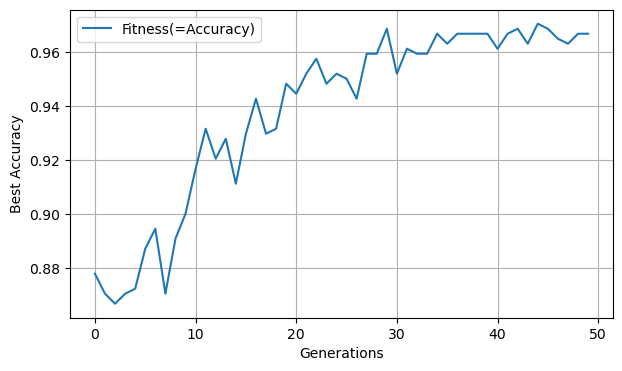

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(7, 4))
ax.plot(np.arange(50), history, label='Fitness(=Accuracy)')
ax.set_xlabel('Generations')
ax.set_ylabel('Best Accuracy')
ax.grid()
ax.legend()
plt.show()